In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
score = lambda d: d['logret'].ewm(span = 7, min_periods = 7).mean().shift(1)

In [5]:
df = pd.read_csv('test.csv')

       Unnamed: 0        date       adj_prc           prc          high  \
35             79  2018-10-23   6475.740234   6475.740234   6506.009766   
40             84  2018-10-24   6495.839844   6495.839844   6521.990234   
45             89  2018-10-25   6476.290039   6476.290039   6504.649902   
49             93  2018-10-26   6474.750000   6474.750000   6498.290039   
55             99  2018-10-27   6480.379883   6480.379883   6507.410156   
...           ...         ...           ...           ...           ...   
10934       11094  2024-11-03  68741.117188  68741.117188  69361.656250   
10935       11095  2024-11-04  67811.507812  67811.507812  69433.179688   
10940       11100  2024-11-05  69359.562500  69359.562500  70522.789062   
10949       11109  2024-11-06  75639.078125  75639.078125  76460.156250   
10951       11111  2024-11-08  76048.757812  76048.757812  76850.507812   

                low          open           vol     tick       ret    logret  \
35      6451.270020

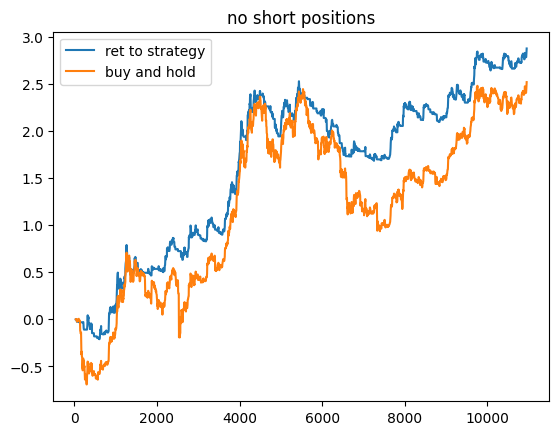

In [8]:
#no short selling

df = pd.read_csv('proj_data.csv')
#df = pd.read_csv('test.csv')
df = df[df.tick == 'BTC-USD']
df[f'score'] = score(df)
df.dropna(subset=('score'), inplace=True)

df['position'] = df.score >=0
df['position_X_logret'] = df.position*df.logret

print(df)

plt.plot(df['position_X_logret'].cumsum(), label = 'ret to strategy')
plt.plot(df['logret'].cumsum(), label = 'buy and hold')

plt.legend()
plt.title('no short positions')
plt.show()

0        0.0
5        0.0
10       0.0
12       0.0
16       0.0
        ... 
10934    0.0
10935    0.0
10940    0.0
10949    1.0
10951    1.0
Name: score, Length: 2193, dtype: float64
       Unnamed: 0        date       adj_prc           prc          high  \
0              43  2018-10-16   6596.109863   6596.109863   6673.589844   
5              49  2018-10-17   6544.430176   6544.430176   6601.209961   
10             54  2018-10-18   6476.709961   6476.709961   6567.540039   
12             56  2018-10-19   6465.410156   6465.410156   6493.680176   
16             60  2018-10-20   6489.189941   6489.189941   6497.720215   
...           ...         ...           ...           ...           ...   
10934       11094  2024-11-03  68741.117188  68741.117188  69361.656250   
10935       11095  2024-11-04  67811.507812  67811.507812  69433.179688   
10940       11100  2024-11-05  69359.562500  69359.562500  70522.789062   
10949       11109  2024-11-06  75639.078125  75639.078125  76460.

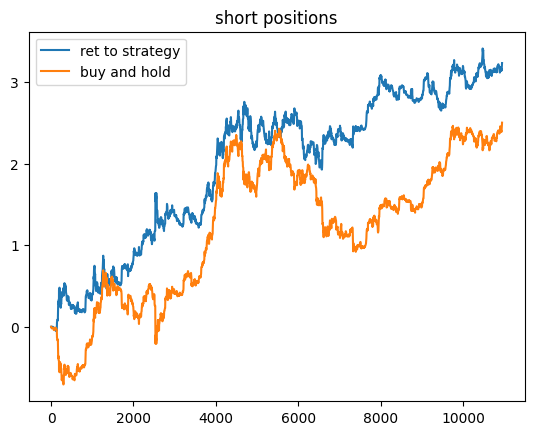

In [9]:
#short positions

df = pd.read_csv('proj_data.csv')
df = df[df.tick == 'BTC-USD']
df[f'score'] = score(df)
n = len(df)
mask_l = df.score >=0 
mask_s = df.score < 0
print(np.ones(n)*mask_l)
df['position'] = np.ones(n)*mask_l - np.ones(n)*mask_s
df['position_X_logret'] = df.position*df.logret

print(df)

plt.plot(df['position_X_logret'].cumsum(), label = 'ret to strategy')
plt.plot(df['logret'].cumsum(), label = 'buy and hold')

plt.legend()
plt.title('short positions')
plt.show()